In [13]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from astropy.io import fits

# to make this notebook's output stable across runs
np.random.seed(7)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
DATA_DIR= os.path.join(os.environ['HOME'],
                       'Downloads/1741p242')

simcat=fits.open(os.path.join(DATA_DIR,
                 'rs0/obiwan',
                 'simcat-elg-1741p242.fits'))[1].data

obitractor= fits.open(os.path.join(DATA_DIR,
                     'rs0/tractor',
                     'tractor-1741p242.fits'))[1].data

dr5tractor= fits.open(os.path.join(DATA_DIR,
                     'dr5',
                     'tractor-1741p242.fits'))[1].data

In [15]:
from astropy.coordinates import SkyCoord
from astropy import units as u
sim_coord = SkyCoord(ra=simcat['ra']*u.degree, 
                        dec=simcat['dec']*u.degree)  
obi_coord = SkyCoord(ra=obitractor['ra']*u.degree, 
                     dec=obitractor['dec']*u.degree)  
# idx, d2d, d3d = .match_to_catalog_sky(catalog)  


# isim,itrac,d= match_radec(simcat.ra, simcat.dec, obitractor.ra, obitractor.dec,          
#                           1./3600.0,nearest=True)
# not_isim= not_index(isim,len(simcat))
# not_itrac= not_index(itrac,len(obitractor))

In [24]:
sim_coord.match_to_catalog_3d?

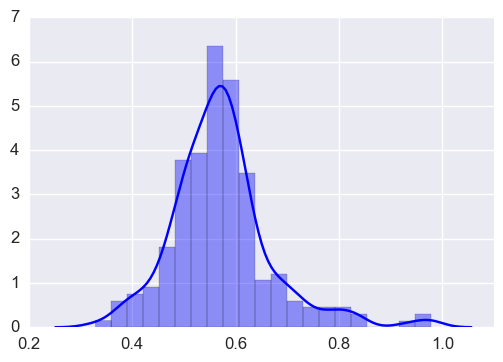

In [29]:
isim, itrac, d2d, _ = obi_coord.search_around_sky(sim_coord, u.deg*1./3600)

def indices2bool(indices,n):
    keep= np.zeros(n,bool)
    keep[indices]=True
    return keep
bsim=indices2bool(isim,len(simcat))
btrac=indices2bool(itrac,len(obitractor))

sns.distplot(d2d*3600,color='b')

In [30]:
recovered= simcat[bsim]
real= obitractor[~btrac]

## Nbody kit

In [40]:
## Example

In [45]:
NDATA = 10000
# randomly distributed RA/DEC on the sky
data = RandomCatalog(NDATA, seed=42)
data['RA']  = data.rng.uniform(low=110, high=260, size=len(data))
data['DEC'] = data.rng.uniform(low=-3.6, high=60., size=len(data))
data['Weight'] = np.random.random(size=len(data))
edges = np.linspace(0.1, 10., 20+1) # 20 total bins

# run the algorithm
r_auto = AngularPairCount(data, edges, ra='RA', dec='DEC', weight='Weight')

pc = r_auto.result
plt.plot(pc['theta'], pc['npairs'])

# format the axes
plt.xlabel(r"$\theta$ [$\mathrm{degrees}$]")
plt.ylabel(r"$DD(\theta)$")

RuntimeError: calling the function 'Corrfunc.mocks.DDtheta_mocks.DDtheta_mocks' failed:
exception: Could not import the C extension for the angular correlation function for mocks.
stdout: 
stderr: 

In [41]:
from nbodykit.source.catalog.array import ArrayCatalog,RandomCatalog
recovered= ArrayCatalog(simcat[bsim])
real= ArrayCatalog(obitractor[~btrac])

ImportError: cannot import name RandomCatalog

In [42]:
# compute the cross correlation pair counts
from nbodykit.lab import AngularPairCount,RandomCatalog
edges = np.linspace(0.25/1e2,0.25/1e1,20+1)
r_cross = AngularPairCount(real, edges, ra='ra', dec='dec', 
                           second=recovered)

RuntimeError: calling the function 'Corrfunc.mocks.DDtheta_mocks.DDtheta_mocks' failed:
exception: Could not import the C extension for the angular correlation function for mocks.
stdout: 
stderr: 